In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

df = pd.read_csv('chatgpt_reviews.csv')
df.head()

Review Id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              Review  Ratings  \
0                                               good        5   
1                                               good        5   
2                                           nice app        5   
3                                           nice, ig        5   
4  this is a great app, the bot is so accurate to...        5   

           Review Date  
0  2024-08-23 19:30:05  
1  2024-08-23 19:28:18  
2  2024-08-23 19:22:59  
3  2024-08-23 19:20:50  
4  2024-08-23 19:20:39

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [4]:
# Basic data cleaning

# Standardizing Cols

df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')


In [5]:
# checking for missing value

df.isnull().sum()

review_id      0
review         6
ratings        0
review_date    0
dtype: int64

we see there are 6 null in review column. We will fill those with empty string

In [6]:
df.fillna('', inplace=True)

df.isnull().sum()

review_id      0
review         0
ratings        0
review_date    0
dtype: int64

In [7]:
# converting date to datetime

df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

In [8]:
# ensuring rating col is numbers

df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [9]:
# calculating sentiment polarity

from textblob import TextBlob

df['sentiment_polarity'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [10]:
def sentiment_catogrization(polarity):
  if polarity > 0.1:
    return 'positive'
  elif polarity < -0.1:
    return 'negative'
  else:
    return 'neutral'

df['sentiment_category'] = df['sentiment_polarity'].apply(sentiment_catogrization)

In [11]:
# sentiment subjectivity

df['sentiment_subjectivity'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

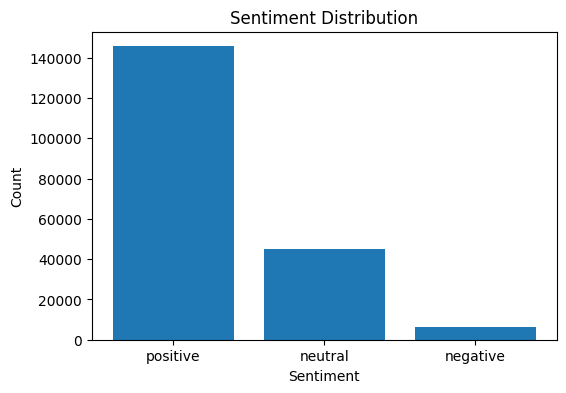

In [12]:
# sentiment visualization

# 1. Distribution

plt.figure(figsize=(6,4))
plt.bar(df['sentiment_category'].value_counts().index, df['sentiment_category'].value_counts().values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

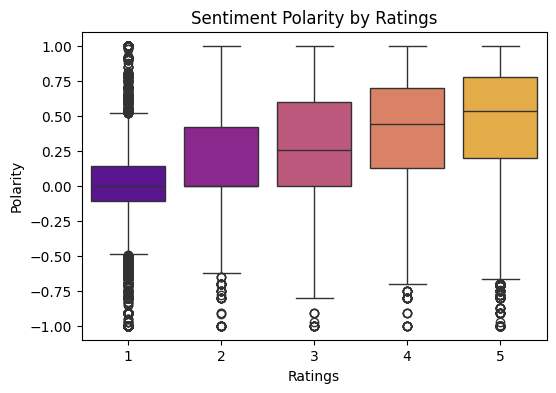

In [13]:
# 2. Polarity vs rating

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='ratings', y='sentiment_polarity', palette='plasma')
plt.title('Sentiment Polarity by Ratings')
plt.xlabel('Ratings')
plt.ylabel('Polarity')
plt.show()

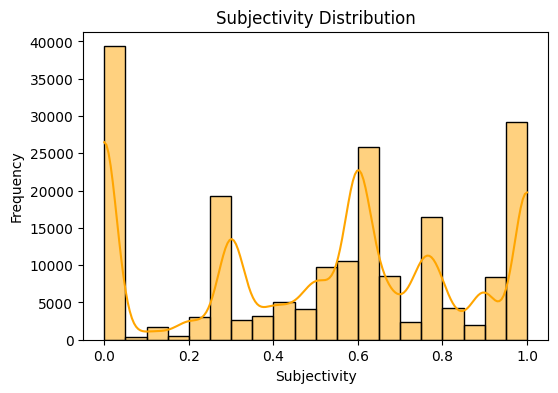

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='sentiment_subjectivity', bins=20, color='orange', kde=True)
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Positive Reviews

positive_reviews = df[df['sentiment_category'] == 'positive']['review'].str.lower().str.cat(sep=' ')
print(positive_reviews)

good good nice app nice, ig this is a great app, the bot is so accurate to anything, it gives me tips, in gaming, studies, and life, etc. this app is also helpful if you were having problems in things! also there are some problems, about the server glitch, but don't worry, some glitches are just seconds, overall a great app. note: the gpt-4o is more powerful, and accurate than the regular one. so nice app just love this app, or guy great app very impressive helps with coding a lot this ai is great for everyone good best ❤️‍🩹❤️‍🩹 nice i love gpt-4o mini its the best it used to be good but now the app keeps saying an error has occured when i try submit something so i don't know what's going on i just love it 😁 this is very useful app 😃 it can give us good suggestions as a mature person you can ask all types of questions it will answered very nicely overall i love it 😍 best the best so far excellent app for learning loved it ❤️❤️❤️ everything is awesome. i wish if the voice chat feature c

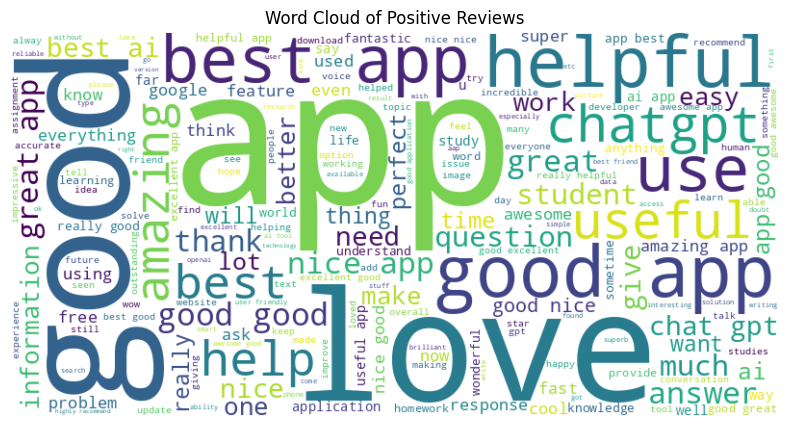

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

In [20]:
import re
from nltk.util import ngrams
from collections import Counter

def get_ngrams(text, n=2):
    tokens = re.findall(r'\w+', text)
    return Counter(ngrams(tokens, n))

bigram_freq = get_ngrams(positive_reviews, 2).most_common(10)
trigram_freq = get_ngrams(positive_reviews, 3).most_common(10)

bigram_df = pd.DataFrame(bigram_freq, columns=['Bigram', 'Count'])
trigram_df = pd.DataFrame(trigram_freq, columns=['Trigram', 'Count'])

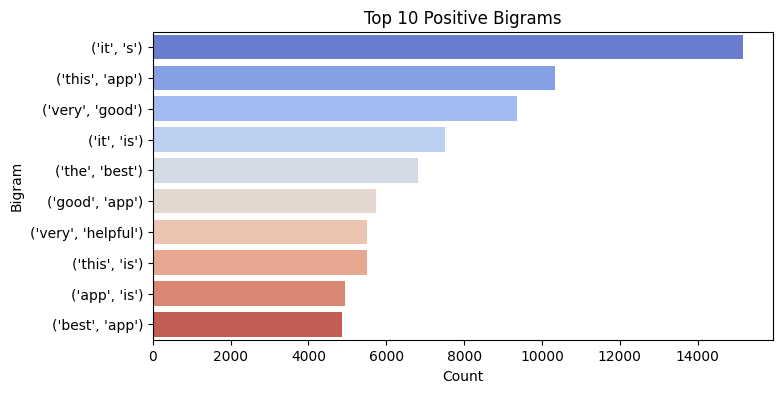

In [21]:
# Bigram Plot
plt.figure(figsize=(8,4))
sns.barplot(data=bigram_df, x='Count', y=bigram_df['Bigram'].astype(str), palette='coolwarm')
plt.title('Top 10 Positive Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

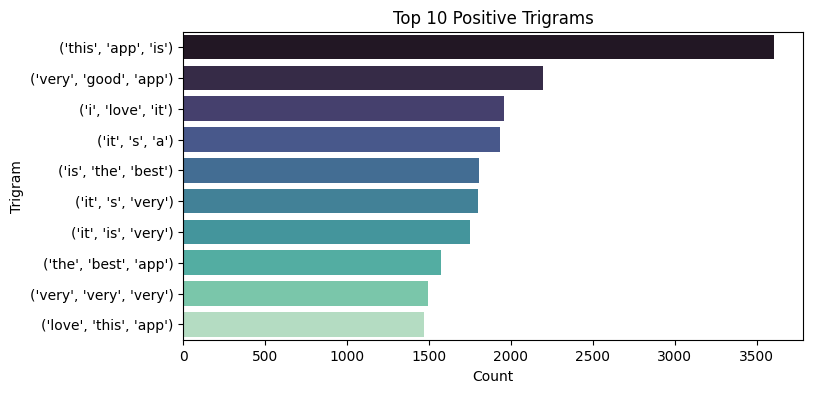

In [22]:
# Trigram Plot
plt.figure(figsize=(8,4))
sns.barplot(data=trigram_df, x='Count', y=trigram_df['Trigram'].astype(str), palette='mako')
plt.title('Top 10 Positive Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

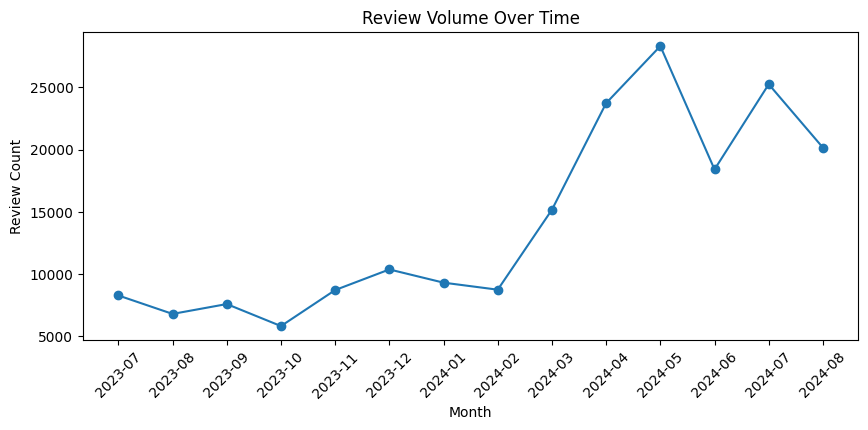

In [23]:
# Review volumne over time

df['review_month'] = df['review_date'].dt.to_period('M')
review_volume = df.groupby('review_month').size()

plt.figure(figsize=(10,4))
plt.plot(review_volume.index.astype(str), review_volume.values, marker='o')
plt.title('Review Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

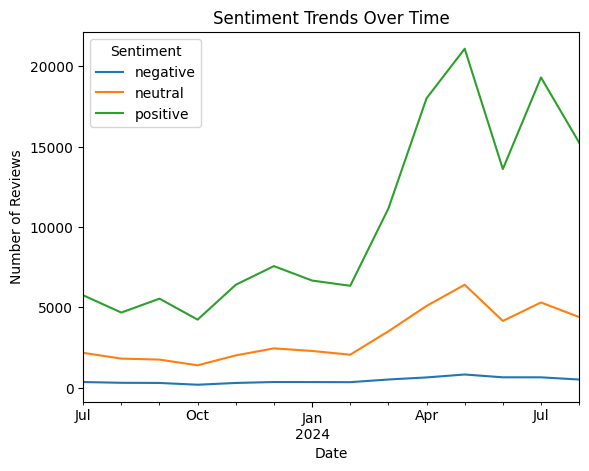

In [28]:
# sentiment trends over time

sentiment_over_time = df.groupby([df['review_date'].dt.to_period('M'), 'sentiment_category']).size().unstack(fill_value=0)
plt.figure(figsize=(12,8))
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()
sentiment_over_time.plot()
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()